# Models


### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('../data')
from process_data import process_data
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import random


In [110]:
#pull in train and test datasets
X_train, y_train,X_test,y_test = process_data(buckets = 10)

In [120]:
nsfw_scores = pd.read_csv('../data/nsfw_scores.csv')
nsfw_scores.drop(columns = ['Unnamed: 0'], inplace = True)


array([[<AxesSubplot:title={'center':'nsfw_scores'}>]], dtype=object)

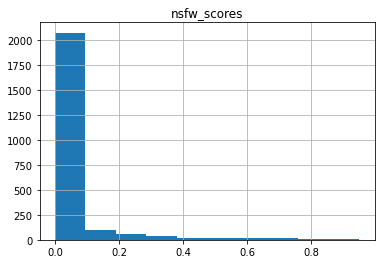

In [126]:
nsfw_scores.hist()

In [112]:
X_train = nsfw_scores[nsfw_scores['video_ids'].isin(X_train.video_id)]
X_test = nsfw_scores[nsfw_scores['video_ids'].isin(X_test.video_id)]

In [113]:
X_train.describe()

,nsfw_scores
count,1859.000000
mean,0.046335
std,0.116467
min,0.000000
25%,0.001900
50%,0.007600
75%,0.028900
max,0.950400


In [114]:
X_test.describe()

,nsfw_scores
count,465.000000
mean,0.043764
std,0.108760
min,0.000000
25%,0.002400
50%,0.008000
75%,0.031300
max,0.838200


### Model: Logistic Regression

In [115]:
X_train = X_train.drop(columns=X_train.select_dtypes(include=['object','datetime64[ns, UTC]']).columns)
X_test = X_test.drop(columns=X_test.select_dtypes(include=['object','datetime64[ns, UTC]']).columns)

In [116]:
y_train['views_category_10']

2316    60
406     30
645     70
1206    90
592     70
        ..
1095    10
1462    30
2197    30
1039     0
1147    30
Name: views_category_10, Length: 1859, dtype: category
Categories (10, int64): [0 < 10 < 20 < 30 ... 60 < 70 < 80 < 90]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
          10       0.00      0.00      0.00        44
          20       0.00      0.00      0.00        58
          30       0.07      0.97      0.13        32
          40       0.14      0.02      0.03        54
          50       0.10      0.06      0.07        35
          60       0.00      0.00      0.00        40
          70       0.00      0.00      0.00        57
          80       0.00      0.00      0.00        44
          90       0.00      0.00      0.00        50

    accuracy                           0.07       465
   macro avg       0.03      0.10      0.02       465
weighted avg       0.03      0.07      0.02       465

Confusion Matrix:



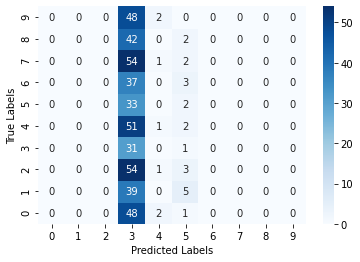

In [105]:
# Instantiate the model with default hyperparameters
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Train the model on the training data
logreg.fit(X_train, y_train['views_category_10'])

# Make predictions on the test data
y_pred = logreg.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Classification Report:\n", cr)

print("Confusion Matrix:\n")
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
ax.invert_yaxis()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



### Model: Gradient Boosted Decision Trees


Classification Report:
               precision    recall  f1-score   support

           0       0.09      0.12      0.10        51
          10       0.13      0.11      0.12        44
          20       0.15      0.07      0.09        58
          30       0.08      0.16      0.11        32
          40       0.09      0.09      0.09        54
          50       0.13      0.14      0.14        35
          60       0.09      0.15      0.11        40
          70       0.14      0.09      0.11        57
          80       0.18      0.20      0.19        44
          90       0.14      0.08      0.10        50

    accuracy                           0.12       465
   macro avg       0.12      0.12      0.12       465
weighted avg       0.12      0.12      0.11       465

Confusion Matrix:



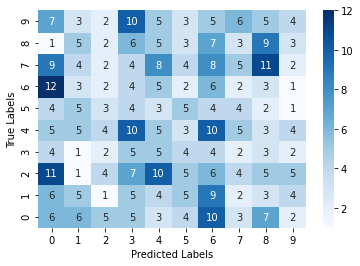

In [117]:


# Instantiate the model with default hyperparameters
gbc = GradientBoostingClassifier()

# Train the model on the training data
gbc.fit(X_train, y_train['views_category_10'])

# Make predictions on the test data
y_pred = gbc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Classification Report:\n", cr)

print("Confusion Matrix:\n")
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
ax.invert_yaxis()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Model: Random Forest
This model was optimized using TPOT, an AutoML library.

Classification Report:
               precision    recall  f1-score   support

           0       0.09      0.10      0.10        51
          10       0.12      0.11      0.11        44
          20       0.15      0.10      0.12        58
          30       0.08      0.12      0.10        32
          40       0.07      0.06      0.06        54
          50       0.08      0.11      0.10        35
          60       0.03      0.05      0.03        40
          70       0.15      0.12      0.13        57
          80       0.03      0.02      0.02        44
          90       0.22      0.12      0.16        50

    accuracy                           0.09       465
   macro avg       0.10      0.09      0.09       465
weighted avg       0.11      0.09      0.10       465

Confusion Matrix:



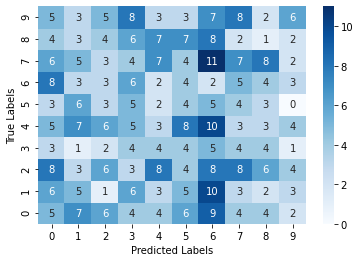

In [118]:

# Instantiate the model with default hyperparameters
rfc = RandomForestClassifier()

# Train the model on the training data
rfc.fit(X_train, y_train['views_category_10'])

# Make predictions on the test data
y_pred = rfc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Classification Report:\n", cr)

print("Confusion Matrix:\n")
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
ax.invert_yaxis()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()